# Clasificación de Instrumentos Musicales con Filtros y CNN

In [19]:
#Importar bibliotecas
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Filtro Sobel

In [20]:
# Ruta del dataset descomprimido
data_dir = '/content/drive/MyDrive/Diplomado/Módulo 6/archive/dataset'

In [21]:
# Parámetros del modelo
target_size = (64, 64)
batch_size = 32
epochs = 10

# Preprocesamiento de imágenes con rescalado
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 96 images belonging to 4 classes.
Found 24 images belonging to 4 classes.


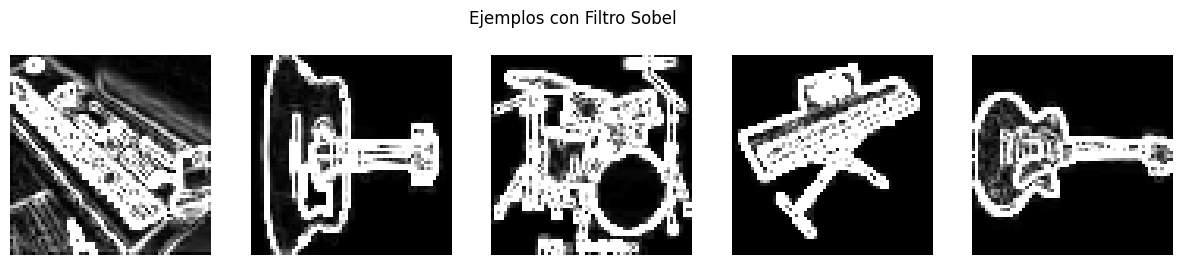

In [22]:
# Visualizar algunas imágenes con filtro Sobel
def aplicar_filtro_sobel(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel = np.sqrt(sobelx**2 + sobely**2)
    sobel = np.uint8(np.clip(sobel, 0, 255))
    return sobel

sample_imgs, _ = next(train_generator)
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    sobel_img = aplicar_filtro_sobel((sample_imgs[i] * 255).astype(np.uint8))
    axs[i].imshow(sobel_img, cmap='gray')
    axs[i].axis('off')
plt.suptitle('Ejemplos con Filtro Sobel')
plt.show()

In [23]:
# Construcción del modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Entrenamiento del modelo
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,668 (6.20 MB)

 Trainable params: 1,625,668 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 437ms/step - accuracy: 0.2773 - loss: 1.8905 - val_accuracy: 0.5000 - val_loss: 1.4945
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step - accuracy: 0.2747 - loss: 1.5738 - val_accuracy: 0.4583 - val_loss: 1.3213
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step - accuracy: 0.3372 - loss: 1.3149 - val_accuracy: 0.5833 - val_loss: 1.2668
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step - accuracy: 0.5182 - loss: 1.2579 - val_accuracy: 0.5000 - val_loss: 1.2081
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step - accuracy: 0.5794 - loss: 1.1460 - val_accuracy: 0.6667 - val_loss: 1.0557
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step - accuracy: 0.6797 - loss: 0.9973 - val_accuracy: 0.7083 - val_loss: 0.9000
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step - accuracy: 0.7422 - loss: 0.8308 - val_accuracy: 0.7500 - val_loss: 0.7833
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 439ms/step - accuracy: 0.7031 - loss: 0.7090 - val_accuracy: 0.7917 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.7917 - loss: 0.6037

Precisión en validación: 0.79


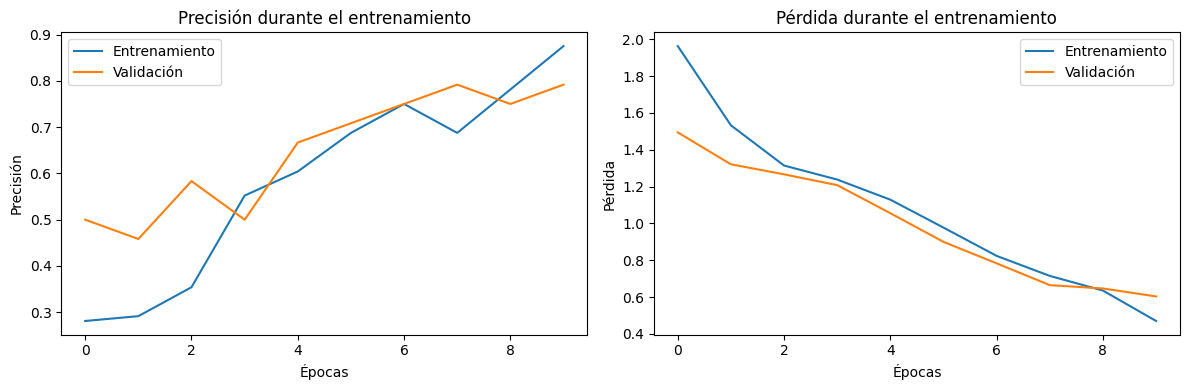

In [24]:
# Evaluación
loss, acc = model.evaluate(val_generator)
print(f"\nPrecisión en validación: {acc:.2f}")

# Gráficas de entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.tight_layout()
plt.show()


# Filtro Canny

Found 96 images belonging to 4 classes.
Found 24 images belonging to 4 classes.


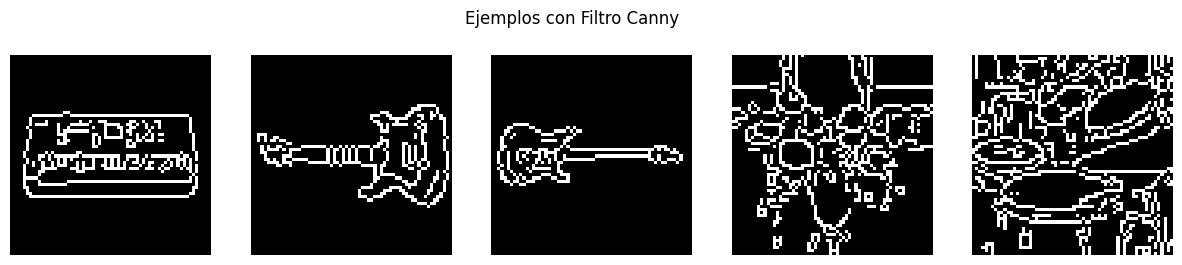

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,668 (6.20 MB)

 Trainable params: 1,625,668 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 449ms/step - accuracy: 0.2969 - loss: 1.5160 - val_accuracy: 0.3750 - val_loss: 1.4174
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step - accuracy: 0.2865 - loss: 1.3914 - val_accuracy: 0.2500 - val_loss: 1.3787
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step - accuracy: 0.3841 - loss: 1.3085 - val_accuracy: 0.4583 - val_loss: 1.2879
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step - accuracy: 0.5026 - loss: 1.1948 - val_accuracy: 0.4583 - val_loss: 1.1877
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step - accuracy: 0.6133 - loss: 1.0255 - val_accuracy: 0.6250 - val_loss: 1.0619
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 432ms/step - accuracy: 0.7826 - loss: 0.8554 - val_accuracy: 0.5417 - val_loss: 0.9330
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 479ms/step - accuracy: 0.6914 - loss: 0.7340 - val_accuracy: 0.6667 - val_loss: 0.8344
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 270ms/step - accuracy: 0.8906 - loss: 0.5026 - val_accuracy: 0.6250 - val_loss:

In [25]:
# Ruta del dataset descomprimido
data_dir = '/content/drive/MyDrive/Diplomado/Módulo 6/archive/dataset'

# Parámetros del modelo
target_size = (64, 64)
batch_size = 32
epochs = 10

# Preprocesamiento de imágenes con rescalado
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Visualizar algunas imágenes con filtro Canny
def aplicar_filtro_canny(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    canny = cv2.Canny(img_gray, 100, 200)
    return canny

sample_imgs, _ = next(train_generator)
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    canny_img = aplicar_filtro_canny((sample_imgs[i] * 255).astype(np.uint8))
    axs[i].imshow(canny_img, cmap='gray')
    axs[i].axis('off')
plt.suptitle('Ejemplos con Filtro Canny')
plt.show()

# Construcción del modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Entrenamiento del modelo
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.7083 - loss: 0.7636

Precisión en validación: 0.71


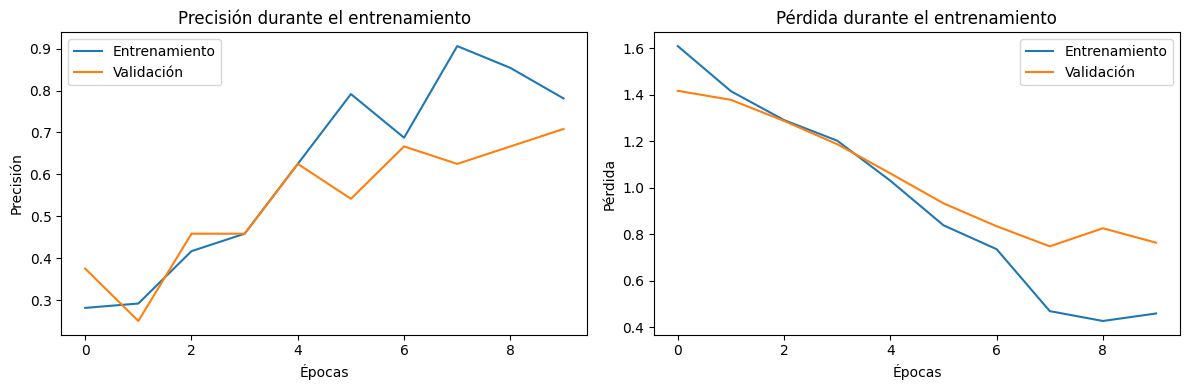

In [26]:
# Evaluación
loss, acc = model.evaluate(val_generator)
print(f"\nPrecisión en validación: {acc:.2f}")

# Gráficas de entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.tight_layout()
plt.show()

# Filtro Laplaciano

Found 96 images belonging to 4 classes.
Found 24 images belonging to 4 classes.


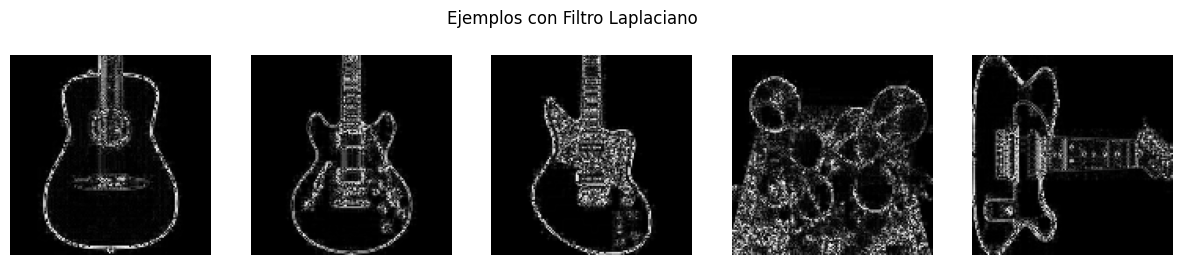

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,836 (28.20 MB)

 Trainable params: 7,392,836 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2318 - loss: 6.7548 - val_accuracy: 0.2500 - val_loss: 3.9121
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3008 - loss: 4.9808 - val_accuracy: 0.4167 - val_loss: 1.6361
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 854ms/step - accuracy: 0.3307 - loss: 1.8858 - val_accuracy: 0.3750 - val_loss: 1.2860
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 872ms/step - accuracy: 0.4531 - loss: 1.1886 - val_accuracy: 0.4583 - val_loss: 1.1605
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 920ms/step - accuracy: 0.7018 - loss: 0.9615 - val_accuracy: 0.5417 - val_loss: 1.0452
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7422 - loss: 0.7806 - val_accuracy: 0.5417 - val_loss: 1.0619
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 852ms/step - accuracy: 0.7461 - loss: 0.7172 - val_accuracy: 0.5417 - val_loss: 1.0210
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 867ms/step - accuracy: 0.8424 - loss: 0.5323 - val_accuracy: 0.5833 - val_loss: 0.7787
E

In [27]:
# Ruta del dataset descomprimido
data_dir = '/content/drive/MyDrive/Diplomado/Módulo 6/archive/dataset'

# Parámetros del modelo
target_size = (128, 128)
batch_size = 32
epochs = 10

# Preprocesamiento de imágenes con rescalado
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Visualizar algunas imágenes con filtro Laplaciano
def aplicar_filtro_laplaciano(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    laplaciano = cv2.Laplacian(img_gray, cv2.CV_64F)
    laplaciano = np.uint8(np.absolute(laplaciano))
    return laplaciano

sample_imgs, _ = next(train_generator)
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    lap_img = aplicar_filtro_laplaciano((sample_imgs[i] * 255).astype(np.uint8))
    axs[i].imshow(lap_img, cmap='gray')
    axs[i].axis('off')
plt.suptitle('Ejemplos con Filtro Laplaciano')
plt.show()

# Construcción del modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Entrenamiento del modelo
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.7083 - loss: 0.7207

Precisión en validación: 0.71


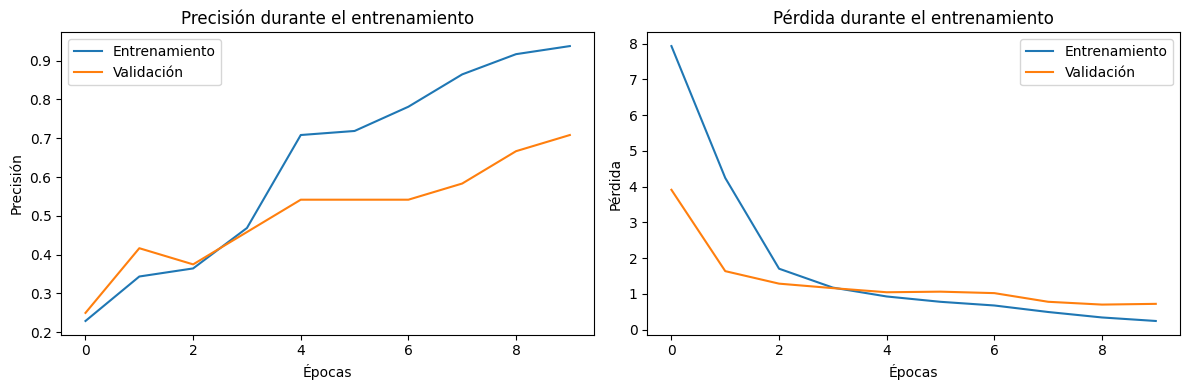

In [28]:
# Evaluación
loss, acc = model.evaluate(val_generator)
print(f"\nPrecisión en validación: {acc:.2f}")

# Gráficas de entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.tight_layout()
plt.show()

# Filtro Prewitt

Found 96 images belonging to 4 classes.
Found 24 images belonging to 4 classes.


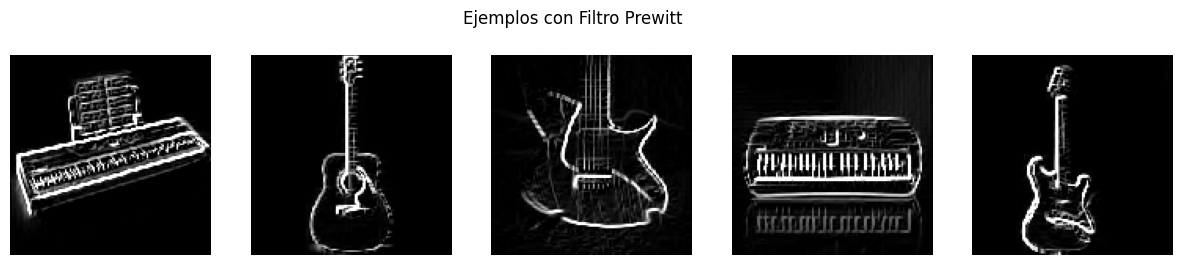

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,836 (28.20 MB)

 Trainable params: 7,392,836 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2135 - loss: 3.0351 - val_accuracy: 0.5000 - val_loss: 1.6487
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.2721 - loss: 1.8017 - val_accuracy: 0.3750 - val_loss: 1.3048
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4870 - loss: 1.2252 - val_accuracy: 0.2917 - val_loss: 1.2726
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 890ms/step - accuracy: 0.5039 - loss: 1.1314 - val_accuracy: 0.6250 - val_loss: 1.0215
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 898ms/step - accuracy: 0.7031 - loss: 0.8044 - val_accuracy: 0.6667 - val_loss: 0.8246
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 899ms/step - accuracy: 0.8451 - loss: 0.5505 - val_accuracy: 0.7500 - val_loss: 0.7603
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9323 - loss: 0.2933 - val_accuracy: 0.7083 - val_loss: 0.6872
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9245 - loss: 0.1959 - val_accuracy: 0.7083 - val_loss: 0.8943
Epoch 9

In [33]:
# Ruta del dataset descomprimido
data_dir = '/content/drive/MyDrive/Diplomado/Módulo 6/archive/dataset'

# Parámetros del modelo
target_size = (128, 128)
batch_size = 32
epochs = 10

# Preprocesamiento de imágenes con rescalado
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Visualizar algunas imágenes con filtro Prewitt
def aplicar_filtro_prewitt(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    prewittx = cv2.filter2D(img_gray, -1, kernelx)
    prewitty = cv2.filter2D(img_gray, -1, kernely)
    prewitt = cv2.magnitude(prewittx.astype(float), prewitty.astype(float))
    prewitt = np.uint8(np.clip(prewitt, 0, 255))
    return prewitt

sample_imgs, _ = next(train_generator)
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    prewitt_img = aplicar_filtro_prewitt((sample_imgs[i] * 255).astype(np.uint8))
    axs[i].imshow(prewitt_img, cmap='gray')
    axs[i].axis('off')
plt.suptitle('Ejemplos con Filtro Prewitt')
plt.show()

# Construcción del modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Entrenamiento del modelo
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.5833 - loss: 1.1765

Precisión en validación: 0.58


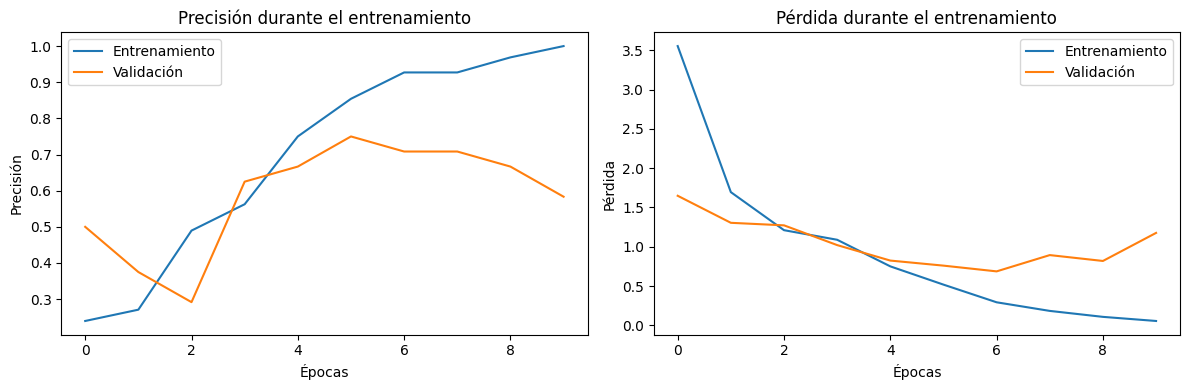

In [34]:
# Evaluación
loss, acc = model.evaluate(val_generator)
print(f"\nPrecisión en validación: {acc:.2f}")

# Gráficas de entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.tight_layout()
plt.show()